In [81]:
import widgetsnbextension
import ipywidgets
import arcgis
import notebook

In [82]:
print(widgetsnbextension.__version__)
print(ipywidgets.__version__)
print(arcgis.__version__)
print(notebook.__version__)

3.5.1
7.6.3
2.1.0.2
6.4.0


### arcgis

In [83]:
from arcgis.gis import GIS

In [84]:
#MapView.set_js_cdn("https://ucsdonline.maps.arcgis.com/jsapi/jsapi4/")

In [85]:
#my_gis = GIS("https://ucsdonline.maps.arcgis.com/jsapi/jsapi4")
my_gis = GIS()
my_gis.map()

MapView(layout=Layout(height='400px', width='100%'))

### ipyleaflet
Sample from <https://github.com/jupyter-widgets/ipyleaflet/blob/master/examples/BaseMap.ipynb>

In [8]:
from ipyleaflet import *

m = Map(center=(52, 10), zoom=8, basemap=basemaps.NASAGIBS.ModisTerraTrueColorCR)
strava_all = basemap_to_tiles(basemaps.Strava.All)
m.add_layer(strava_all)
m

Map(center=[52, 10], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [9]:
import ipywidgets

ipywidgets.HBox([m, Map(center=[43.6, 1.44], zoom=10)])

### mesa_geo
Sample from <https://github.com/corvince/mesa-geo/README.md>

Arizona


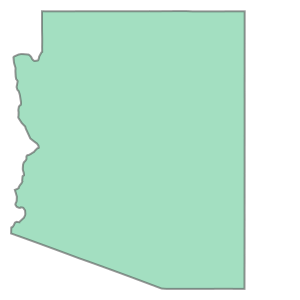

In [11]:
import mesa
import mesa_geo as mg
import requests

url = "http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json"
r = requests.get(url)
geojson_states = r.json()

# Newer example code from https://mesa-geo.readthedocs.io/en/main/tutorials/intro_tutorial.html

class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)


class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace()
        # Suppress warnings
        self.space.warn_crs_conversion = False

        ac = mg.AgentCreator(agent_class=State, model=self)
        agents = ac.from_GeoJSON(GeoJSON=geojson_states, unique_id="NAME")
        self.space.add_agents(agents)
        
m = GeoModel()

agent = m.space.agents[0]
print(agent.unique_id)
agent.geometry



### kepler.gl
Sample from <https://github.com/keplergl/kepler.gl/blob/master/bindings/kepler.gl-jupyter/notebooks/
Load%20kepler.gl.ipynb>

In [2]:
import keplergl
import pandas as pd
import requests

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/uber-common/deck.gl-data/master/examples/3d-heatmap/heatmap-data.csv')

# Create a kepler.gl map
map_1 = keplergl.KeplerGl(height=400)

# Add data to the map
map_1.add_data(data=df, name='earthquakes')

# Render the map
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'earthquakes': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

### graphviz

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}



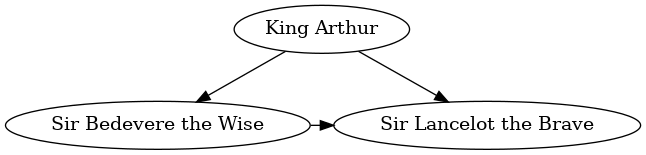

In [7]:
from graphviz import Digraph
from IPython.display import Image

dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
print(dot.source)

dot.render('test-output/round-table.gv', format='png')
# Renders Digraph output in Jupyter Notebook
Image(filename='test-output/round-table.gv.png')